# # Duramat Webinar: US NREL Electric Futures 2021

This journal simulates the Reference and High Electrification scenarios from Electrification Futures, and comparing to a glass baseline with High bifacial future projection. 
 
Installed Capacity considerations from bifacial installations are not considered here.
 
Results from this journal were presented during Duramat's webinar April 2021 – “The Impacts of Module Reliability and Lifetime on PV in the Circular Economy" presented by Teresa Barnes, Silvana Ayala, and Heather Mirletz, NREL. 


In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'DURAMAT')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)



Your simulation will be stored in C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\DURAMAT


In [8]:
MATERIALS = ['glass','silver','silicon', 'copper','aluminium_frames']
MATERIAL = MATERIALS[0]

MODULEBASELINE = r'..\..\baselines\ElectrificationFutures_2021\baseline_modules_US_NREL_Electrification_Futures_2021_basecase.csv'
MODULEBASELINE_High = r'..\..\baselines\ElectrificationFutures_2021\baseline_modules_US_NREL_Electrification_Futures_2021_LowREHighElec.csv'


In [3]:
import PV_ICE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [4]:
PV_ICE.__version__


'v0.2.0+65.gb072a64.dirty'

In [5]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

In [7]:
pwd

'C:\\Users\\Silvana\\Documents\\GitHub\\CircularEconomy-MassFlowCalculator\\PV_ICE\\TEMP\\DURAMAT'

In [9]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='base', file=MODULEBASELINE)
r1.scenario['base'].addMaterials(MATERIALS, r'..\..\baselines')
r1.createScenario(name='high', file=MODULEBASELINE_High)
r1.scenario['high'].addMaterials(MATERIALS, r'..\..\baselines')

r2 = PV_ICE.Simulation(name='bifacialTrend', path=testfolder)
r2.createScenario(name='base', file=MODULEBASELINE)
r2.scenario['base'].addMaterials(MATERIALS, r'..\..\baselines')
MATERIALBASELINE = r'..\..\baselines\PVSC_2021\baseline_material_glass_bifacialTrend.csv'
r2.scenario['base'].addMaterial('glass', file=MATERIALBASELINE)

r2.createScenario(name='high', file=MODULEBASELINE_High)
r2.scenario['high'].addMaterials(MATERIALS, r'..\..\baselines')
MATERIALBASELINE = r'..\..\baselines\PVSC_2021\baseline_material_glass_bifacialTrend.csv'
r2.scenario['high'].addMaterial('glass', file=MATERIALBASELINE)

path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\DURAMAT
path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\DURAMAT


In [10]:
IRENA= False
ELorRL = 'EL'
if IRENA:
    r1.scenMod_IRENIFY(scenarios=['base', 'high'], ELorRL = ELorRL )
    r2.scenMod_IRENIFY(scenarios=['base', 'high'], ELorRL = ELorRL )
    title_Method = 'Irena_'+ELorRL
else:
    title_Method = 'PVICE'
r1.calculateMassFlow()
r2.calculateMassFlow()

Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silver
==> Working on Material :

In [11]:
objects = [r1, r2]
scenarios = ['base', 'high']


In [23]:
pvice_Usyearly1, pvice_Uscum1 = r1.aggregateResults()
pvice_Usyearly2, pvice_Uscum2 = r2.aggregateResults()
UScum = pd.concat([pvice_Uscum1, pvice_Uscum2], axis=1)
USyearly = pd.concat([pvice_Usyearly1, pvice_Usyearly2], axis=1)

UScum.to_csv('pvice_USCum.csv')
USyearly.to_csv('pvice_USYearly.csv')

In [22]:
# OLD METHOD
'''
USyearly=pd.DataFrame()

keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


# Loop over objects
for kk in range(0, len(objects)):
    obj = objects[kk]

    # Loop over Scenarios
    for jj in range(0, len(scenarios)):
        case = scenarios[jj]
        
        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["Waste_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('Waste_') and col.endswith(obj.name+'_'+case)) ]
        USyearly['Waste_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)

# Converting to grams to Tons. 
USyearly.head(20)


keyword='mat_Total_EOL_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

# Loop over objects
for kk in range(0, len(objects)):
    obj = objects[kk]

    # Loop over Scenarios
    for jj in range(0, len(scenarios)):
        case = scenarios[jj]
        
        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["Waste_EOL_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('Waste_EOL_') and col.endswith(obj.name+'_'+case)) ]
        USyearly['Waste_EOL_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)

# Converting to grams to Tons. 
USyearly.head(20)


keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

# Loop over objects
for kk in range(0, len(objects)):
    obj = objects[kk]

    # Loop over Scenarios
    for jj in range(0, len(scenarios)):
        case = scenarios[jj]
        
        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["VirginStock_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('VirginStock_') and col.endswith(obj.name+'_'+case)) ]
        USyearly['VirginStock_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)


# ### Converting to grams to METRIC Tons. 



USyearly = USyearly/1000000  # This is the ratio for Metric tonnes
#907185 -- this is for US tons



UScum = USyearly.copy()
UScum = UScum.cumsum()




keyword='Installed_Capacity_[W]'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

# Loop over SF Scenarios
for kk in range(0, len(objects)):
    obj = objects[kk]
    
    # Loop over Scenarios
    for jj in range(0, len(scenarios)):
        case = scenarios[jj]
        
        foo = obj.scenario[case].data[keyword]
        foo = foo.to_frame(name=keyword)
        UScum["Capacity_"+obj.name+'_'+case] = foo[keyword]


USyearly.index = r1.scenario['base'].data['year']
UScum.index = r1.scenario['base'].data['year']

USyearly.to_csv('USyearly_Oldmethod.csv')
UScum.to_csv('UScum_Oldmethod.csv')
''';

# ## Mining Capacity


In [24]:

mining2020_aluminum = 65267000
mining2020_silver = 22260
mining2020_copper = 20000000
mining2020_silicon = 8000000


In [25]:

objects = [r1, r2]
scenarios = ['base', 'high']


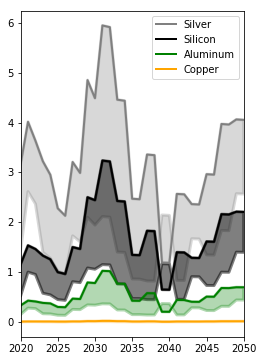

In [27]:


plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keyw='VirginStock_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

fig, axs = plt.subplots(1,1, figsize=(4, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)


# Loop over CASES
name2 = 'Simulation1_high_[Tonnes]'
name0 = 'Simulation1_base_[Tonnes]'
# ROW 2, Aluminum and Silicon:        g-  4 aluminum k - 1 silicon   orange - 3 copper  gray - 2 silver
axs.plot(USyearly[keyw+materials[2]+'_'+name2]*100/mining2020_silver, 
         color = 'gray', linewidth=2.0, label='Silver')

axs.fill_between(USyearly.index, USyearly[keyw+materials[2]+'_'+name0]*100/mining2020_silver, USyearly[keyw+materials[2]+'_'+name2]*100/mining2020_silver,
                   color='gray', lw=3, alpha=.3)
    

axs.plot(USyearly[keyw+materials[1]+'_'+name2]*100/mining2020_silicon, 
         color = 'k', linewidth=2.0, label='Silicon')
axs.fill_between(USyearly.index, USyearly[keyw+materials[1]+'_'+name0]*100/mining2020_silicon, 
                                USyearly[keyw+materials[1]+'_'+name2]*100/mining2020_silicon,
                   color='k', lw=3, alpha=.5)



axs.plot(USyearly[keyw+materials[4]+'_'+name2]*100/mining2020_aluminum, 
         color = 'g', linewidth=2.0, label='Aluminum')

axs.fill_between(USyearly.index, USyearly[keyw+materials[4]+'_'+name0]*100/mining2020_aluminum, 
                                USyearly[keyw+materials[4]+'_'+name2]*100/mining2020_aluminum,
                   color='g', lw=3, alpha=.3)



axs.plot(USyearly[keyw+materials[3]+'_'+name2]*100/mining2020_copper, 
         color = 'orange', linewidth=2.0, label='Copper')

axs.fill_between(USyearly.index, USyearly[keyw+materials[3]+'_'+name0]*100/mining2020_copper, 
                                USyearly[keyw+materials[3]+'_'+name2]*100/mining2020_copper,
                   color='orange', lw=3, alpha=.3)



axs.set_xlim([2020,2050])
axs.legend()
#axs.set_yscale('log')

#axs.set_ylabel('Virgin material needs as a percentage of 2020 global mining production capacity [%]')

fig.savefig(title_Method+' Fig_1x1_MaterialNeeds Ratio to Production_NREL2018.png', dpi=600)


Cumulative Virgin Needs by 2050 Million Tones by Scenario


0     55.813869
1    113.097541
dtype: float64

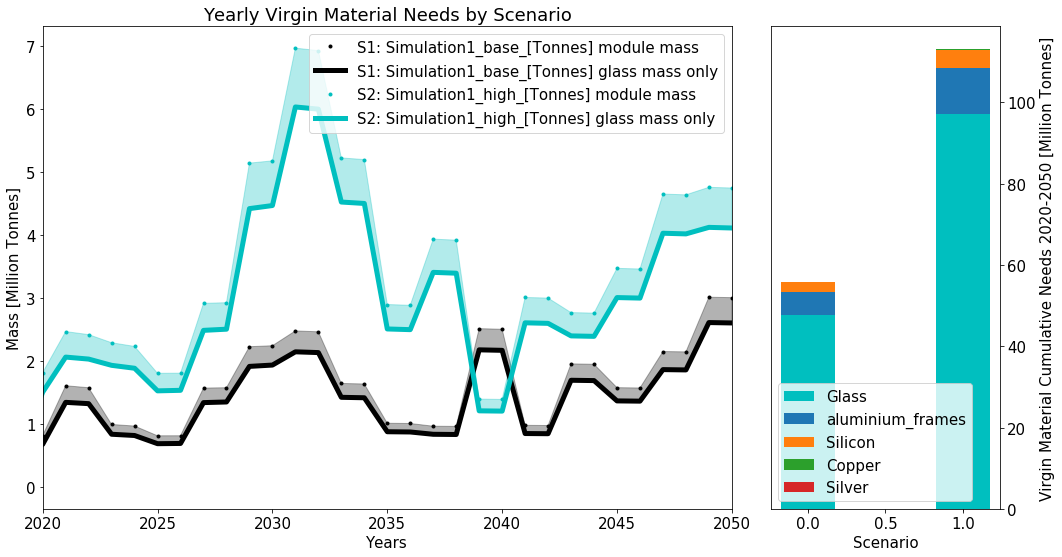

In [28]:

plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='VirginStock_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# loop plotting over scenarios
name2 = 'Simulation1_high_[Tonnes]'
name0 = 'Simulation1_base_[Tonnes]'


# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k.', linewidth=5, label='S1: '+name0+' module mass')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='S1: '+name0+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'c.', linewidth=5, label='S2: '+name2+' module mass')
a0.plot(USyearly.index, glassmat, 'c', linewidth=5, label='S2: '+name2+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Virgin Material Needs by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Virgin Material Cumulative Needs 2020-2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))

f.tight_layout()

f.savefig(title_Method+' Fig_2x1_Yearly Virgin Material Needs by Scenario and Cumulatives_NREL2018.png', dpi=600)


print("Cumulative Virgin Needs by 2050 Million Tones by Scenario")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


# ### Bonus: Bifacial Trend Cumulative Virgin Needs (not plotted, just values)


In [29]:

name2 = 'bifacialTrend_high_[Tonnes]'
name0 = 'bifacialTrend_base_[Tonnes]'

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes
 
print("Cumulative Virgin Needs by 2050 Million Tones by Scenario for Bifacial Trend")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)


Cumulative Virgin Needs by 2050 Million Tones by Scenario for Bifacial Trend


0     58.679314
1    119.207000
dtype: float64

# ### Waste by year


Cumulative Waste by 2050 Million Tones by case


0    7.633358
1    9.573422
dtype: float64

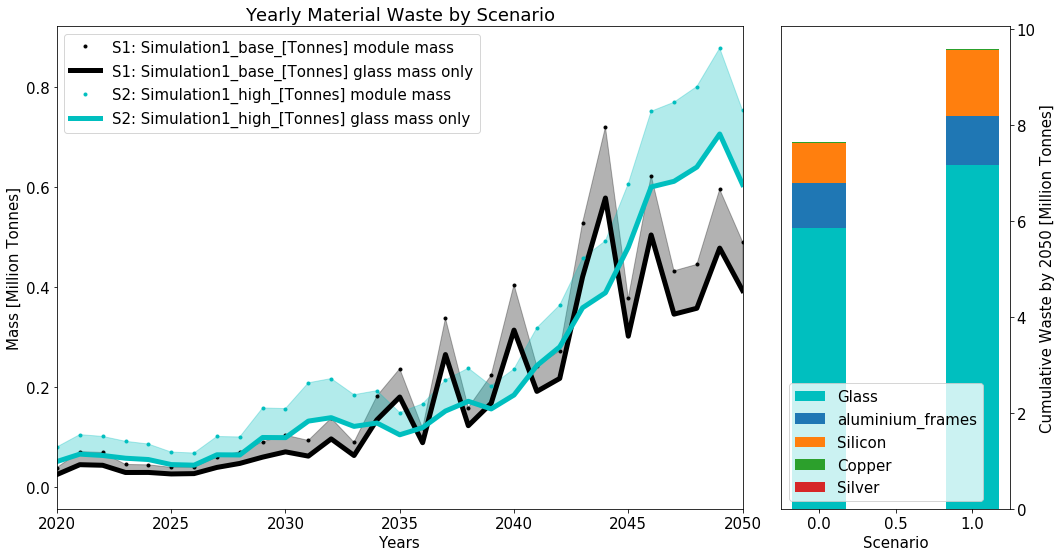

In [34]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='WasteAll_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# loop plotting over scenarios
name2 = 'Simulation1_high_[Tonnes]'
name0 = 'Simulation1_base_[Tonnes]'


# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k.', linewidth=5, label='S1: '+name0+' module mass')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='S1: '+name0+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'c.', linewidth=5, label='S2: '+name2+' module mass')
a0.plot(USyearly.index, glassmat, 'c', linewidth=5, label='S2: '+name2+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Material Waste by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative Waste by 2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))

f.tight_layout()

f.savefig(title_Method+' Fig_2x1_Yearly WASTE by Scenario and Cumulatives_NREL2018.png', dpi=600)

print("Cumulative Waste by 2050 Million Tones by case")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)

Cumulative Eol Only Waste by 2050 Million Tones by case


0    5.967021
1    6.345587
dtype: float64

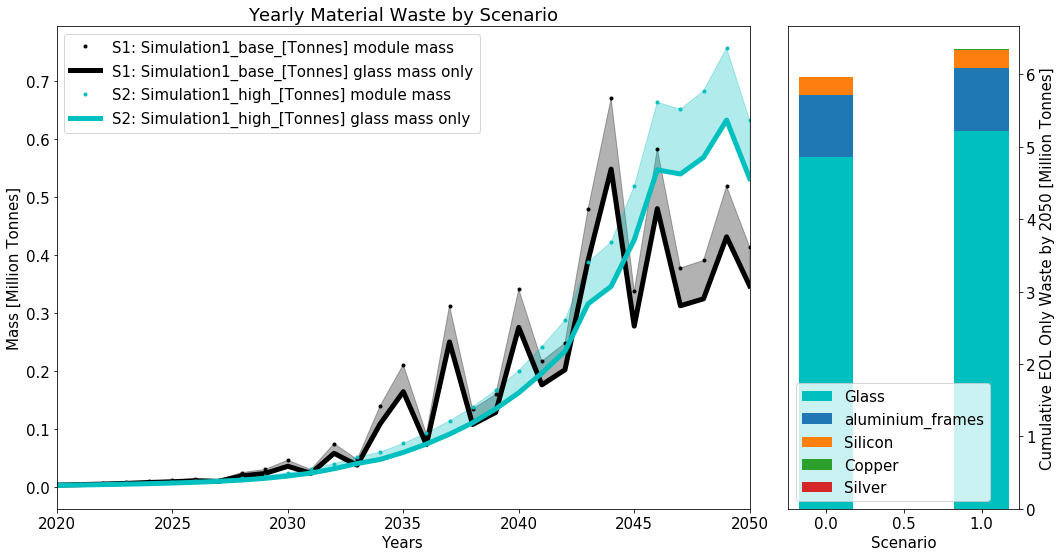

In [36]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keyw='WasteEOL_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']


f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# loop plotting over scenarios
name2 = 'Simulation1_high_[Tonnes]'
name0 = 'Simulation1_base_[Tonnes]'


# SCENARIO 1 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name0]+USyearly[keyw+materials[1]+'_'+name0]+
            USyearly[keyw+materials[2]+'_'+name0]+USyearly[keyw+materials[3]+'_'+name0]+
            USyearly[keyw+materials[4]+'_'+name0])
glassmat = (USyearly[keyw+materials[0]+'_'+name0])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'k.', linewidth=5, label='S1: '+name0+' module mass')
a0.plot(USyearly.index, glassmat, 'k', linewidth=5, label='S1: '+name0+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
modulemat = (USyearly[keyw+materials[0]+'_'+name2]+USyearly[keyw+materials[1]+'_'+name2]+
            USyearly[keyw+materials[2]+'_'+name2]+USyearly[keyw+materials[3]+'_'+name2]+
            USyearly[keyw+materials[4]+'_'+name2])
glassmat = (USyearly[keyw+materials[0]+'_'+name2])
modulemat = modulemat/1000000
glassmat = glassmat/1000000 
a0.plot(USyearly.index, modulemat, 'c.', linewidth=5, label='S2: '+name2+' module mass')
a0.plot(USyearly.index, glassmat, 'c', linewidth=5, label='S2: '+name2+' glass mass only')
a0.fill_between(USyearly.index, glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Material Waste by Scenario')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([2020, 2050])
a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(2)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('Cumulative EOL Only Waste by 2050 [Million Tonnes]')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver'))

f.tight_layout()

f.savefig(title_Method+' Fig_2x1_Yearly EOL Only WASTE by Scenario and Cumulatives_NREL2018.png', dpi=600)

print("Cumulative Eol Only Waste by 2050 Million Tones by case")
dfcumulations2050[['glass','silicon','silver','copper','aluminium_frames']].sum(axis=1)

